In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

In [2]:
datum = '?????'
ext = '.neu'
dir_in = 'data/GPS'

In [3]:
pattern = os.path.join(dir_in, 'd*' + datum + ext)
print(pattern)

data/GPS\d*?????.neu


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\dAB44_99999X006_ULR6B.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
2005-08-15  2005.6205 -0.0134 -0.0114    0.0163    0.0043   0.0037   
2005-08-16  2005.6233 -0.0120 -0.0125    0.0137    0.0039   0.0035   
2005-08-17  2005.6260 -0.0142 -0.0137    0.0185    0.0038   0.0033   
2005-08-18  2005.6288 -0.0124 -0.0132    0.0196    0.0037   0.0033   
2005-08-19  2005.6315 -0.0132 -0.0116    0.0229    0.0048   0.0040   

            VerticalSTD  
Year                     
2005-08-15       0.0103  
2005-08-16       0.0095  
2005-08-17       0.0100  
2005-08-18       0.0095  
2005-08-19       0.0106  


data/GPS\dAB48_XXXXXXXXX_JPL14.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
2005-10-06  2005.7633  0.3145  0.2623   -0.0673    0.0012   0.0007   
2005-10-07  2005.7659  0.3134  0.2667   -0.



data/GPS\dTHU1_43001M001_ULR6B.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
1995-05-03  1995.3356 -0.0435  0.2038   -0.0163    0.0025   0.0021   
1995-05-04  1995.3384 -0.0430  0.2028   -0.0115    0.0019   0.0017   
1995-05-05  1995.3411 -0.0394  0.2033   -0.0108    0.0025   0.0029   
1995-05-06  1995.3438 -0.0412  0.2031   -0.0242    0.0021   0.0016   
1995-05-07  1995.3466 -0.0443  0.2036   -0.0181    0.0026   0.0020   

            VerticalSTD  
Year                     
1995-05-03       0.0091  
1995-05-04       0.0090  
1995-05-05       0.0126  
1995-05-06       0.0085  
1995-05-07       0.0100  


data/GPS\dTHU2_43001M002_ULR6B.neu
              YearDec   North    East  Vertical  NorthSTD  EastSTD  \
Year                                                                 
1998-11-15  1998.8726 -0.0276  0.1282   -0.0457    0.0027   0.0025   
1998-11-16  1998.8753 -0.0251  0.1231   -0.

In [6]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    
    return res

def test_plot_OLS(df, res, site, var):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))])
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {res.params.x1 * 1000:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    

In [7]:
def plot_OLS_overlay(df, res, site, var, data_units, simpletrend=True):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='Data', marker=',', linestyle='', color='black')
    
    ## Plot linea model
    if simpletrend:
        ax.plot((df[var].index[0], df[var].index[-1]), 
            (res.params.x1* 1000 + res.params.const, res.params.x1*df.shape[0] + res.params.const),
               label='Trend', linestyle='--', color='purple')
    else:
            ax.plot(df[var].index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var]))])

    ## zero line
#     ax.plot((df[var].index[0], df[var].index[-1]), (0, 0), 'k')
    
    ## customize
#     ax.set_title(f"Trend = {res.params.x1 * 1000:.2f} mm/yr");
    ax.set_ylabel(data_units)
    plt.suptitle(f"{site}")
    plt.legend()
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')

In [8]:
def convert_trend_toyearly(df, res):
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend



data/GPS\dAB44_99999X006_ULR6B.neu
f: 0
Trend = 17.25 mm/yr


data/GPS\dAB48_XXXXXXXXX_JPL14.neu
f: 1
Trend = 6.73 mm/yr


data/GPS\dAB50_99999X007_ULR6B.neu
f: 2
Trend = 18.06 mm/yr


data/GPS\dAKSE_XXXXXXXXX_NGL14.neu
f: 3
Trend = 3.48 mm/yr


data/GPS\dAKSI_XXXXXXXXX_NGL14.neu
f: 4
Trend = 6.59 mm/yr


data/GPS\dANC2_XXXXXXXXX_NGL14.neu
f: 5
Trend = 2.50 mm/yr


data/GPS\dCHUR_40128M002_ULR6B.neu
f: 6
Trend = 11.07 mm/yr


data/GPS\dEYAC_99999X043_ULR6B.neu
f: 7
Trend = 1.47 mm/yr


data/GPS\dJNU1_49519S001_NGL14.neu
f: 8
Trend = 18.25 mm/yr


data/GPS\dKEN5_XXXXXXXXX_NGL14.neu
f: 9
Trend = 22.92 mm/yr


data/GPS\dNUUK_43013M001_NGL14.neu
f: 10
Trend = 9.21 mm/yr


data/GPS\dQAQ1_43007M001_ULR6B.neu
f: 11
Trend = 4.04 mm/yr


data/GPS\dSCOR_43006M002_ULR6B.neu
f: 12
Trend = 4.53 mm/yr


data/GPS\dTBON_XXXXXXXXX_NGL14.neu
f: 13
Trend = 4.66 mm/yr


data/GPS\dTHU1_43001M001_ULR6B.neu
f: 14
Trend = 3.61 mm/yr


data/GPS\dTHU2_43001M002_ULR6B.neu
f: 15
Trend = 7.05 mm/yr


data/GPS\dT

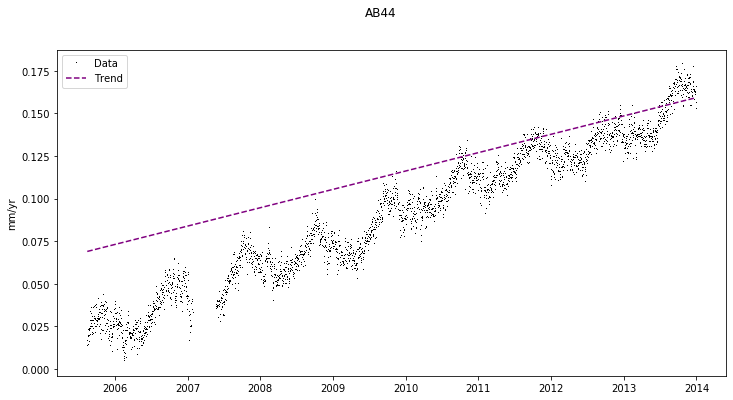

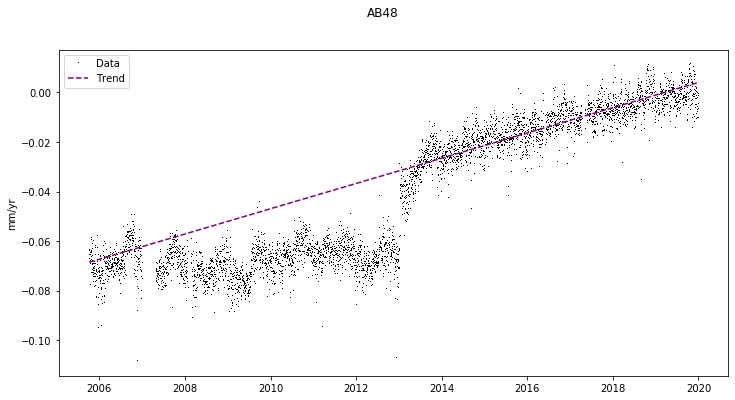

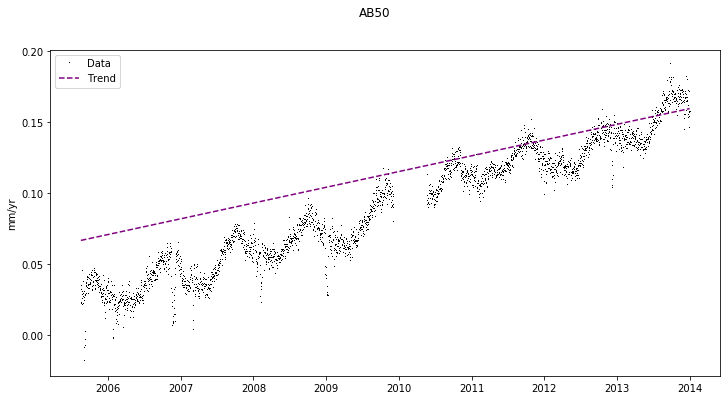

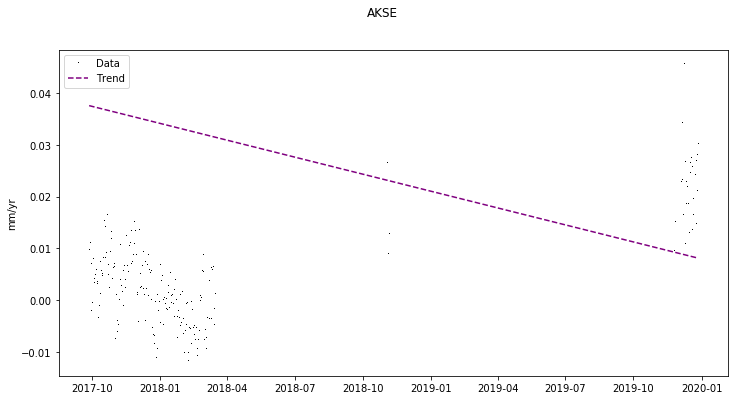

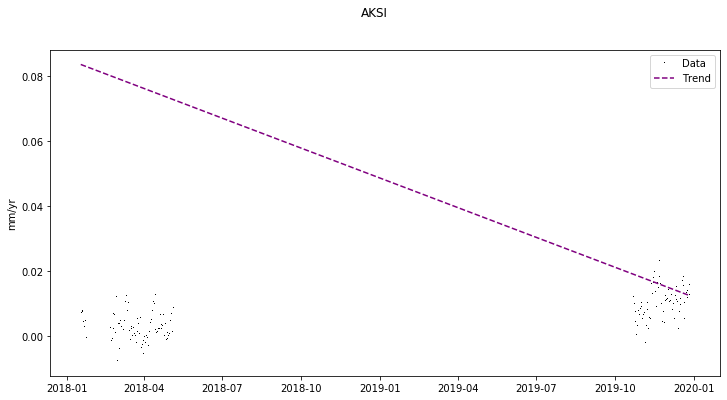

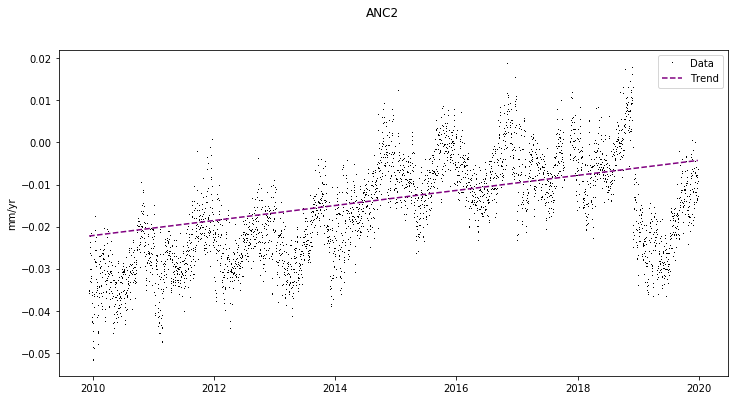

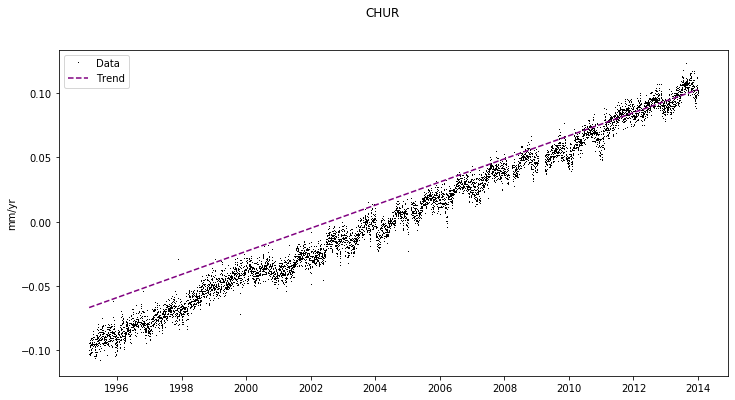

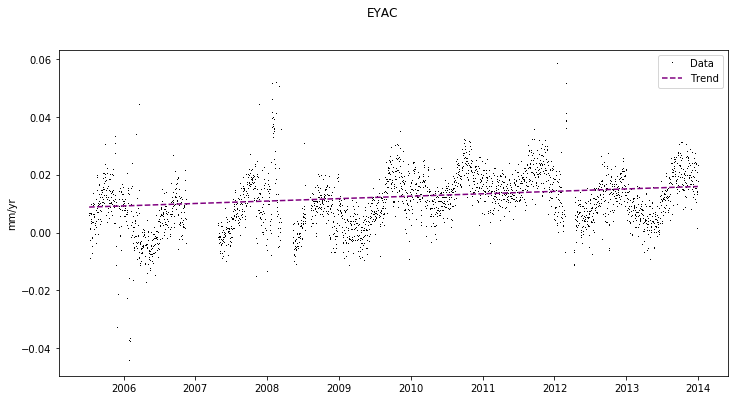

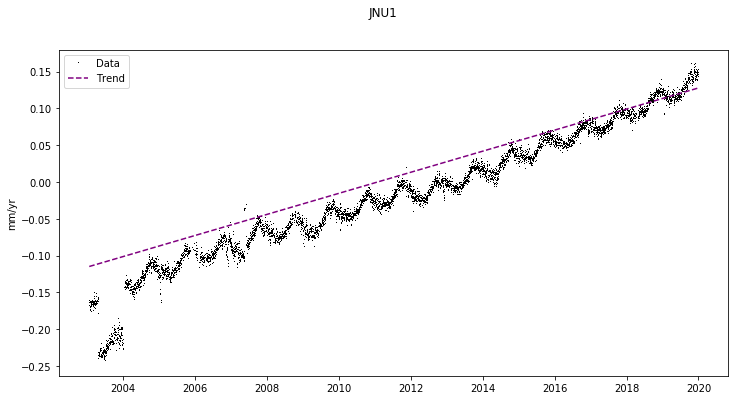

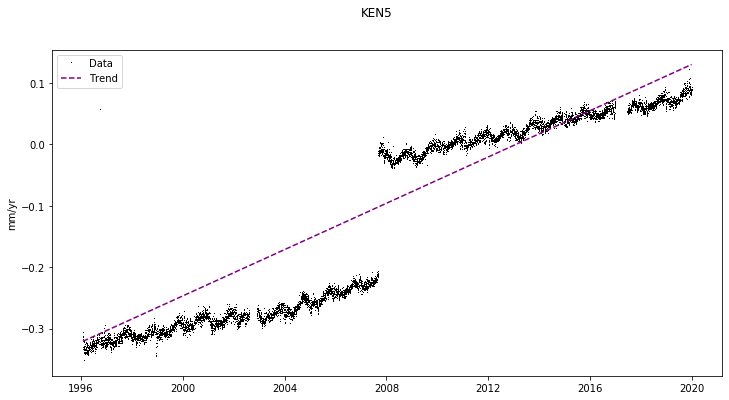

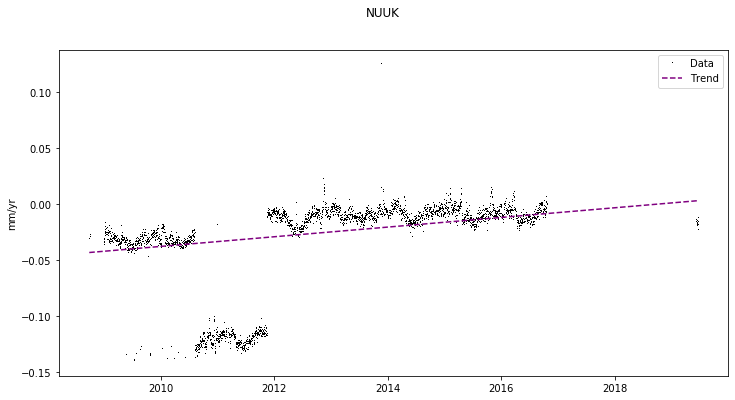

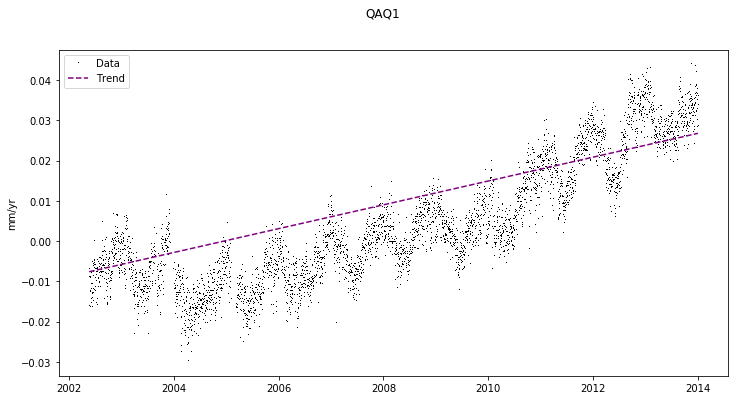

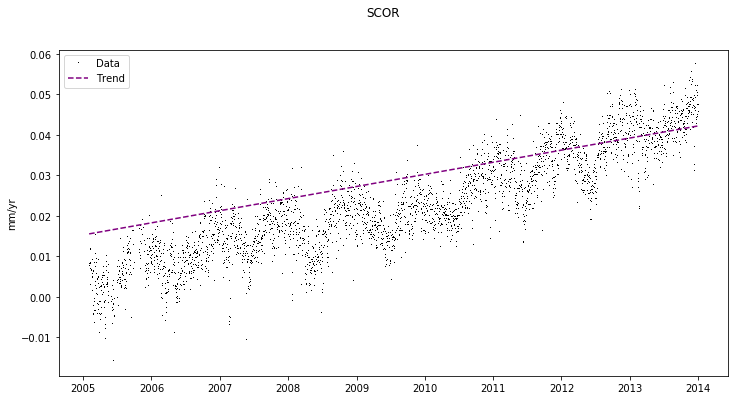

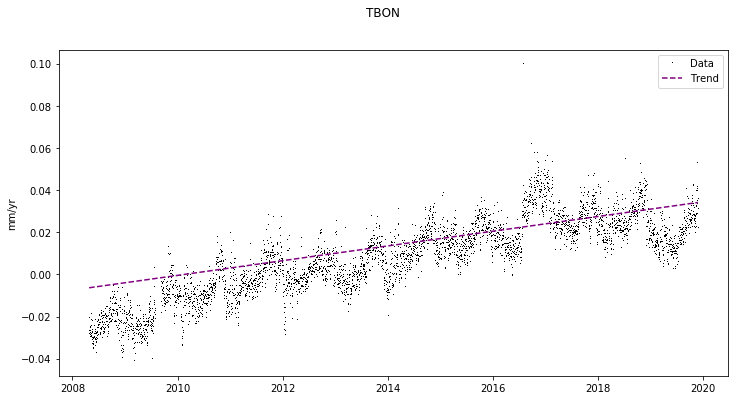

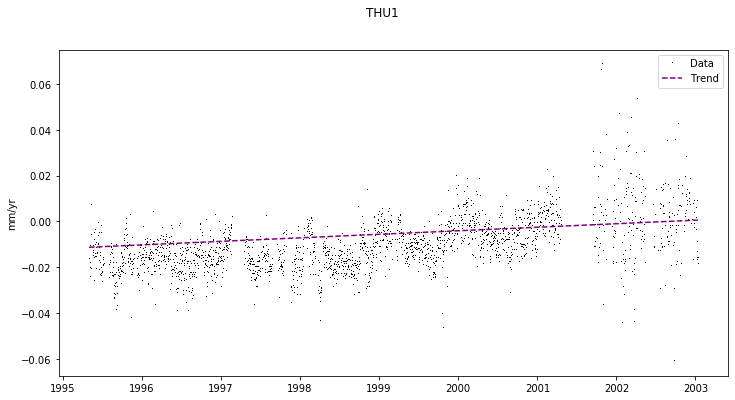

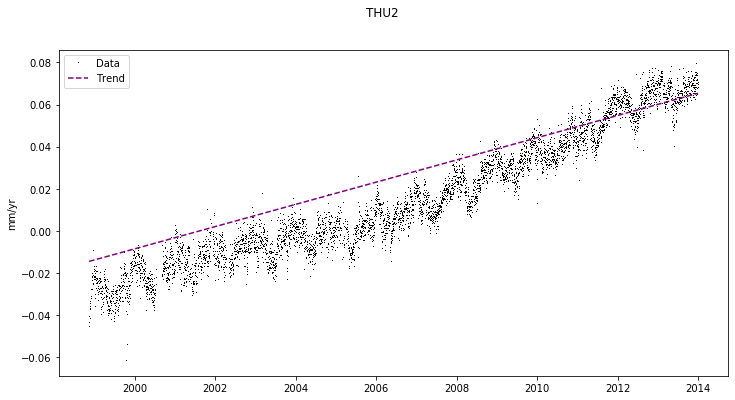

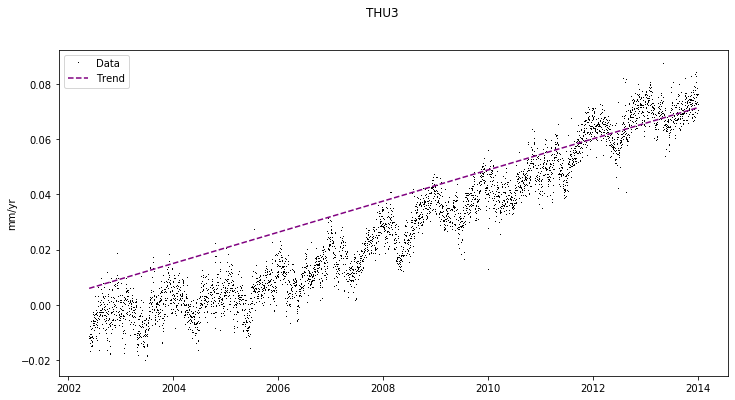

In [9]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)

    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    convert_trend_toyearly(df, res)
    sonel_trend_array[f] = convert_trend_toyearly(df, res)
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend = {sonel_trend_array[f] * 1000:.2f} mm/yr")
#     print(res.summary())

    # Make Plot
    plot_OLS_overlay(df, res, filepath[-24:-20], 'Vertical', 'mm/yr')